In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\suyas\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df = pd.read_csv('exoplanet24.csv')

In [10]:
#df = pd.read_csv('exoplanet24.csv')

In [5]:
df.head()

pl_name hostname  default_flag  sy_snum  sy_pnum  discoverymethod  \
0  11 Com b   11 Com             0        2        1  Radial Velocity   
1  11 Com b   11 Com             0        2        1  Radial Velocity   
2  11 Com b   11 Com             1        2        1  Radial Velocity   
3  11 UMi b   11 UMi             1        1        1  Radial Velocity   
4  11 UMi b   11 UMi             0        1        1  Radial Velocity   

   disc_year                           disc_facility              soltype  \
0       2007                        Xinglong Station  Published Confirmed   
1       2007                        Xinglong Station  Published Confirmed   
2       2007                        Xinglong Station  Published Confirmed   
3       2009  Thueringer Landessternwarte Tautenburg  Published Confirmed   
4       2009  Thueringer Landessternwarte Tautenburg  Published Confirmed   

   pl_controv_flag  ... sy_vmagerr2  sy_kmag  sy_kmagerr1  sy_kmagerr2  \
0                0  ...      -0.023    2.282        0.346       -0.346   
1                0  ...      -0.023    2.282        0.346       -0.346   
2                0  ...      -0.023    2.282        0.346       -0.346   
3                0  ...      -0.005    1.939        0.270       -0.270   
4                0  ...      -0.005    1.939        0.270       -0.270   

   sy_gaiamag  sy_gaiamagerr1  sy_gaiamagerr2   rowupdate  pl_pubdate  \
0     4.44038        0.003848       -0.003848  23-07-2014     2011-08   
1     4.44038        0.003848       -0.003848  14-05-2014     2008-01   
2     4.44038        0.003848       -0.003848  19-09-2023     2023-08   
3     4.56216        0.003903       -0.003903  04-09-2018     2017-03   
4     4.56216        0.003903       -0.003903  25-04-2018     2011-08   

   releasedate  
0   23-07-2014  
1   14-05-2014  
2   19-09-2023  
3   06-09-2018  
4   23-07-2014  

[5 rows x 92 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36370 entries, 0 to 36369
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          36370 non-null  object 
 1   hostname         36370 non-null  object 
 2   default_flag     36370 non-null  int64  
 3   sy_snum          36370 non-null  int64  
 4   sy_pnum          36370 non-null  int64  
 5   discoverymethod  36370 non-null  object 
 6   disc_year        36370 non-null  int64  
 7   disc_facility    36370 non-null  object 
 8   soltype          36370 non-null  object 
 9   pl_controv_flag  36370 non-null  int64  
 10  pl_refname       36370 non-null  object 
 11  pl_orbper        33220 non-null  float64
 12  pl_orbpererr1    31680 non-null  float64
 13  pl_orbpererr2    31679 non-null  float64
 14  pl_orbperlim     33220 non-null  float64
 15  pl_orbsmax       19983 non-null  float64
 16  pl_orbsmaxerr1   5522 non-null   float64
 17  pl_orbsmaxer

In [7]:
df.shape

(36370, 92)

In [8]:
df.isnull().sum()

pl_name              0
hostname             0
default_flag         0
sy_snum              0
sy_pnum              0
                  ... 
sy_gaiamagerr1    1001
sy_gaiamagerr2    1001
rowupdate            1
pl_pubdate           0
releasedate          0
Length: 92, dtype: int64

In [9]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

pl_orbper          3150
pl_orbpererr1      4690
pl_orbpererr2      4691
pl_orbperlim       3150
pl_orbsmax        16387
                  ...  
sy_kmagerr2         943
sy_gaiamag         1001
sy_gaiamagerr1     1001
sy_gaiamagerr2     1001
rowupdate             1
Length: 73, dtype: int64

In [10]:
# Drop rows with missing values in important columns like planet mass, radius, and orbital distance
cleaned_data = df.dropna(subset=['pl_bmasse', 'pl_rade', 'pl_orbsmax'])

In [11]:
# Fill missing values with median for numeric columns
df['pl_bmasse'].fillna(df['pl_bmasse'].median(), inplace=True)
df['pl_rade'].fillna(df['pl_rade'].median(), inplace=True)

C:\Users\suyas\AppData\Local\Temp\ipykernel_8852\393310763.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pl_bmasse'].fillna(df['pl_bmasse'].median(), inplace=True)
C:\Users\suyas\AppData\Local\Temp\ipykernel_8852\393310763.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [12]:
# Convert discovery year to integer
df['disc_year'] = pd.to_numeric(df['disc_year'], errors='coerce').fillna(0).astype(int)

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Normalize radius and mass for comparison
scaler = MinMaxScaler()
df[['pl_bmasse', 'pl_rade']] = scaler.fit_transform(df[['pl_bmasse', 'pl_rade']])

In [14]:
# Check for duplicate rows
duplicates = df.duplicated().sum()

# Remove duplicates if found
exoplanet_data = df.drop_duplicates()

In [15]:
df.head()

pl_name hostname  default_flag  sy_snum  sy_pnum  discoverymethod  \
0  11 Com b   11 Com             0        2        1  Radial Velocity   
1  11 Com b   11 Com             0        2        1  Radial Velocity   
2  11 Com b   11 Com             1        2        1  Radial Velocity   
3  11 UMi b   11 UMi             1        1        1  Radial Velocity   
4  11 UMi b   11 UMi             0        1        1  Radial Velocity   

   disc_year                           disc_facility              soltype  \
0       2007                        Xinglong Station  Published Confirmed   
1       2007                        Xinglong Station  Published Confirmed   
2       2007                        Xinglong Station  Published Confirmed   
3       2009  Thueringer Landessternwarte Tautenburg  Published Confirmed   
4       2009  Thueringer Landessternwarte Tautenburg  Published Confirmed   

   pl_controv_flag  ... sy_vmagerr2  sy_kmag  sy_kmagerr1  sy_kmagerr2  \
0                0  ...      -0.023    2.282        0.346       -0.346   
1                0  ...      -0.023    2.282        0.346       -0.346   
2                0  ...      -0.023    2.282        0.346       -0.346   
3                0  ...      -0.005    1.939        0.270       -0.270   
4                0  ...      -0.005    1.939        0.270       -0.270   

   sy_gaiamag  sy_gaiamagerr1  sy_gaiamagerr2   rowupdate  pl_pubdate  \
0     4.44038        0.003848       -0.003848  23-07-2014     2011-08   
1     4.44038        0.003848       -0.003848  14-05-2014     2008-01   
2     4.44038        0.003848       -0.003848  19-09-2023     2023-08   
3     4.56216        0.003903       -0.003903  04-09-2018     2017-03   
4     4.56216        0.003903       -0.003903  25-04-2018     2011-08   

   releasedate  
0   23-07-2014  
1   14-05-2014  
2   19-09-2023  
3   06-09-2018  
4   23-07-2014  

[5 rows x 92 columns]

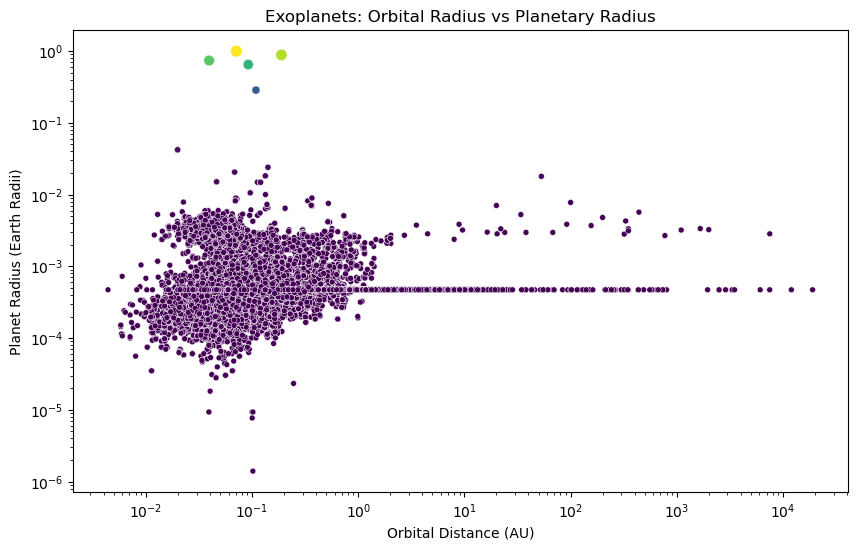

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data with non-null values for orbital distance and planetary radius
filtered_data = df[['pl_orbsmax', 'pl_rade']].dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pl_orbsmax', y='pl_rade', data=filtered_data, hue='pl_rade', palette='viridis', size='pl_rade', legend=False)
plt.title('Exoplanets: Orbital Radius vs Planetary Radius')
plt.xlabel('Orbital Distance (AU)')
plt.ylabel('Planet Radius (Earth Radii)')
plt.xscale('log')
plt.yscale('log')
plt.show()

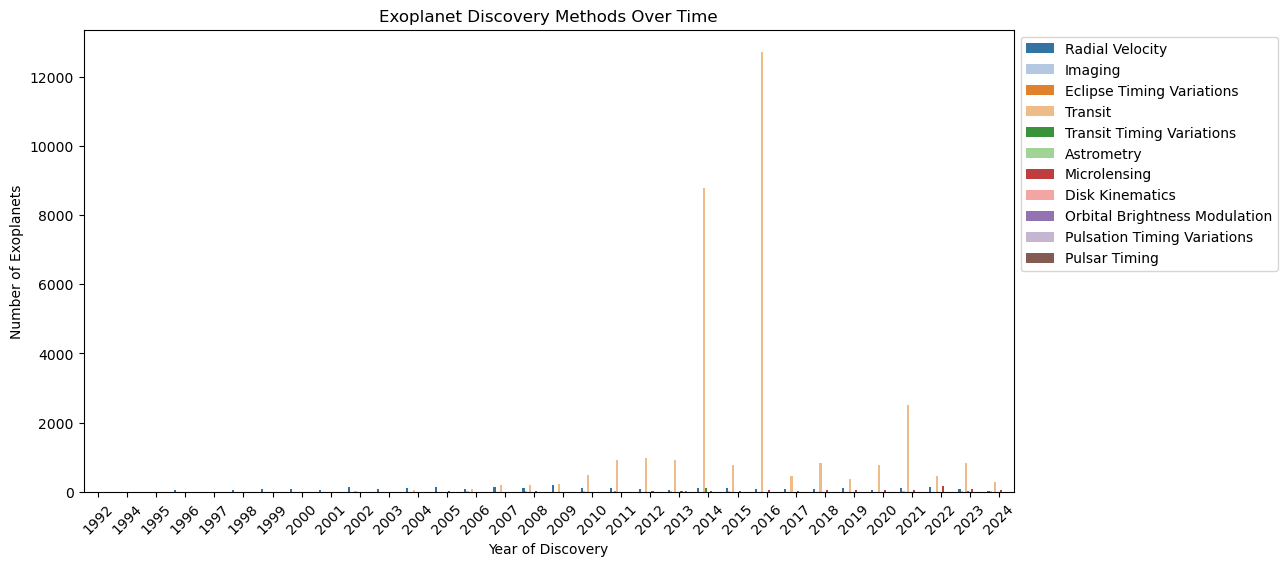

In [17]:
# Filter data to include only discovery year and method
discovery_data = df[['disc_year', 'discoverymethod']].dropna()

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=discovery_data, x='disc_year', hue='discoverymethod', palette='tab20')
plt.title('Exoplanet Discovery Methods Over Time')
plt.xlabel('Year of Discovery')
plt.ylabel('Number of Exoplanets')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

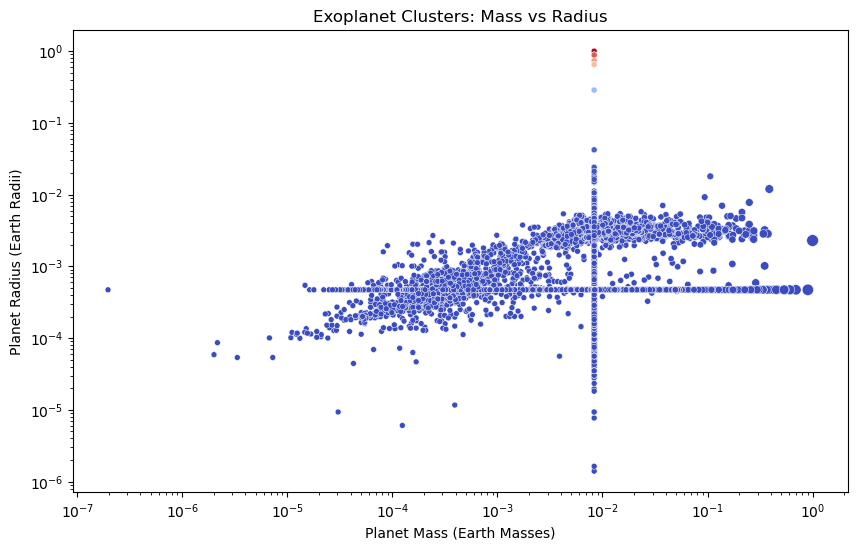

In [18]:
# Filter data for mass and radius
cluster_data = df[['pl_bmasse', 'pl_rade']].dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pl_bmasse', y='pl_rade', data=cluster_data, hue='pl_rade', palette='coolwarm', size='pl_bmasse', legend=False)
plt.title('Exoplanet Clusters: Mass vs Radius')
plt.xlabel('Planet Mass (Earth Masses)')
plt.ylabel('Planet Radius (Earth Radii)')
plt.xscale('log')
plt.yscale('log')
plt.show()

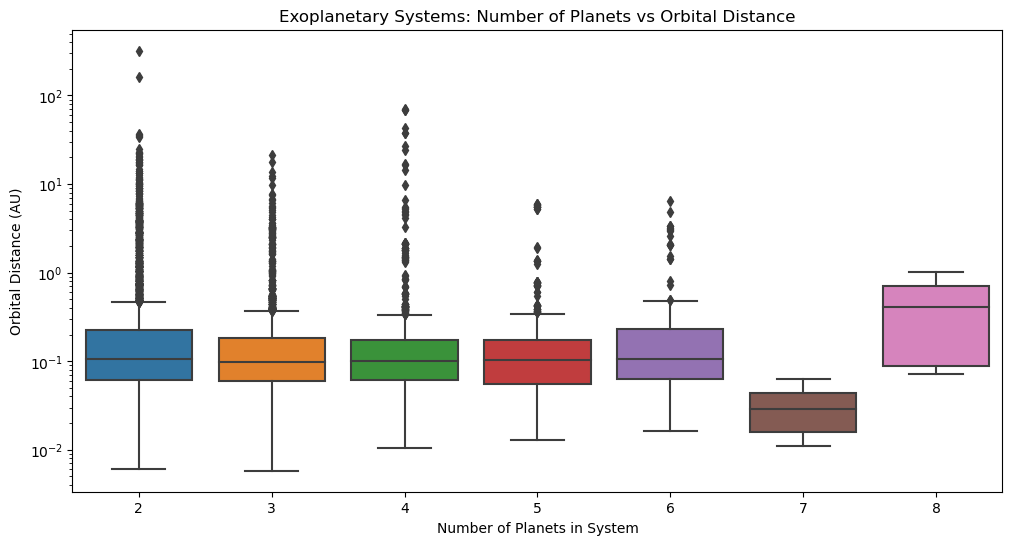

In [19]:
# Filter for systems with more than one planet
system_data = df[df['sy_pnum'] > 1][['hostname', 'sy_pnum', 'pl_orbsmax']].dropna()

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='sy_pnum', y='pl_orbsmax', data=system_data)
plt.title('Exoplanetary Systems: Number of Planets vs Orbital Distance')
plt.xlabel('Number of Planets in System')
plt.ylabel('Orbital Distance (AU)')
plt.yscale('log')
plt.show()

In [20]:
import numpy as np

# Gravitational constant (in AU^3 / Earth masses / year^2)
G = 39.478 # (AU^3/(yr^2*M_sun))

# Assuming stellar mass in terms of Earth masses (sy_snum = number of stars in the system)
df['orbital_velocity'] = np.sqrt(G * df['sy_snum'] / df['pl_orbsmax'])

# Display the first few rows with the new feature
df[['pl_name', 'hostname', 'pl_orbsmax', 'orbital_velocity']].dropna().head()

pl_name hostname  pl_orbsmax  orbital_velocity
0  11 Com b   11 Com       1.210          8.077926
1  11 Com b   11 Com       1.290          7.823439
2  11 Com b   11 Com       1.178          8.186908
3  11 UMi b   11 UMi       1.530          5.079627
4  11 UMi b   11 UMi       1.510          5.113157

In [23]:
# # Normalizing the values
# df['radius_norm'] = df['pl_rade'] / df['pl_rade'].max()
# df['distance_norm'] = df['pl_orbsmax'] / df['pl_orbsmax'].max()
# df['star_temp_norm'] = df['sy_stteff'] / df['sy_stteff'].max()

# # Calculating habitability score (simplified)
# df['habitability_score'] = (1 - df['distance_norm']) * (1 - df['radius_norm']) * (df['star_temp_norm'])

# # Display the top potentially habitable exoplanets
# df[['pl_name', 'hostname', 'habitability_score']].sort_values(by='habitability_score', ascending=False).head()

In [22]:
# Creating a feature for eccentricity deviation from the circular orbit
df['eccentricity_factor'] = np.abs(1 - df['pl_orbeccen'])

# Display the top planets with extreme eccentricity
df[['pl_name', 'hostname', 'pl_orbeccen', 'eccentricity_factor']].sort_values(by='eccentricity_factor', ascending=False).dropna().head()

pl_name     hostname  pl_orbeccen  eccentricity_factor
17375  Kepler-1893 b  Kepler-1893          0.0                  1.0
19179   Kepler-221 d   Kepler-221          0.0                  1.0
19147   Kepler-220 e   Kepler-220          0.0                  1.0
19150   Kepler-221 b   Kepler-221          0.0                  1.0
19151   Kepler-221 b   Kepler-221          0.0                  1.0

In [26]:
import plotly.express as px

# Create a 3D scatter plot
fig = px.scatter_3d(df, x='pl_bmasse', y='pl_rade', z='pl_orbsmax',
                    color='st_teff',  # Use 'st_teff' instead of 'star_temp_norm'
                    hover_data=['pl_name', 'disc_year'],
                    labels={'pl_bmasse': 'Planet Mass', 'pl_rade': 'Planet Radius', 'pl_orbsmax': 'Orbital Distance'})
fig.show()

c:\Users\suyas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


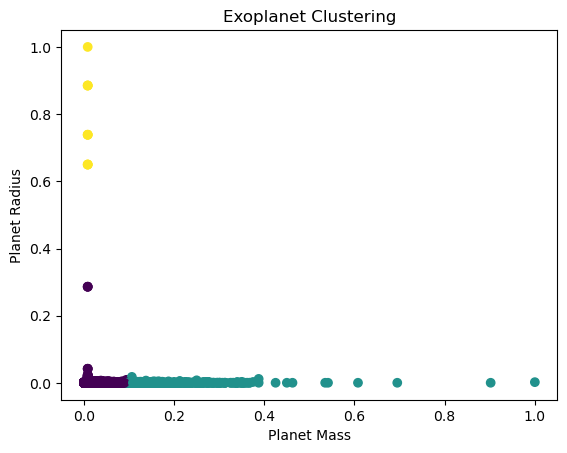

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-Means clustering on planet mass and radius
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['pl_bmasse', 'pl_rade']])

# Visualize the clusters
plt.scatter(df['pl_bmasse'], df['pl_rade'], c=df['cluster'])
plt.xlabel('Planet Mass')
plt.ylabel('Planet Radius')
plt.title('Exoplanet Clustering')
plt.show()

In [27]:
df.to_csv("cleaned_exoplanet_dataset.csv", index=False)